<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/autoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
mat = scipy.io.loadmat('data.mat')
xTrain = np.array(mat['data']['test'][0][0][0][0][0])
yTrain = np.array(mat['data']['test'][0][0][0][0][1])

xTest = np.array(mat['data']['training'][0][0][0][0][0])
yTest = np.array(mat['data']['training'][0][0][0][0][1])

xValidation = np.array(mat['data']['validation'][0][0][0][0][1])
yValidation = np.array(mat['data']['validation'][0][0][0][0][0])

In [28]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
  return np.exp(x) / np.exp(x).sum(axis=0)

def lossFunction(y_true, y_pred):
  loss = -y_true[y_true == 1] @ np.log(y_pred[y_true == 1] + 1e-15) #Cross-entropy
  return loss / len(y_true)

def feedforward(data):
  return ae.feedforward(data)[1]

def getImages(data):
  plt.figure(figsize=(20,5))
  test_y = feedforward(data)
  N = 10
  for i in range(1,N+1):
      plt.subplot(2,N,i)
      plt.imshow(np.reshape(data[:,i], (16,16)), cmap="plasma")
      plt.axis("off")
      plt.grid(b=False)

      plt.subplot(2,N,i+N)
      plt.imshow(np.reshape(test_y[:,i],(16,16)), cmap="plasma")
      plt.axis("off")
      plt.grid(b=False)
  plt.show()

In [44]:
class AutoEncoder:

  def __init__(self, weights, learningRate=0.0165, epochs=1000):
    self.weights = weights
    self.learningRate = learningRate
    self.epochs = epochs
    self.loss = list()
  
  def feedforward(self, data):
    h = sigmoid(self.weights[0] @ data)
    y = softmax(self.weights[1] @ h)
    return (h,y)
  
  def train(self, data):

    for epoch in tqdm(range(self.epochs)):

      forward = self.feedforward(data) 
      hiddenLayerOutput, aeOutput = forward[0], forward[1]

      # SecondLayer
      dL_dpredict = -data / aeOutput
      dpredict_dsoftMax = aeOutput * (dL_dpredict - (dL_dpredict * aeOutput).sum(axis=0))
      dL_dweightSecondLayer = dpredict_dsoftMax @ hiddenLayerOutput.T
      
      # FirstLayer
      dL_dhidden = self.weights[1].T @ dpredict_dsoftMax
      dL_dsigmoid = hiddenLayerOutput * (1 - hiddenLayerOutput) * dL_dhidden
      dL_dweightFirstLayer = dL_dsigmoid @ data.T 
      
      # Coefficients update
      self.weights[1] -= self.learningRate * dL_dweightSecondLayer / len(data)
      self.weights[0] -= self.learningRate * dL_dweightFirstLayer / len(data)

      # Loss calculation
      self.loss.append(lossFunction(data.T, aeOutput.T))

In [45]:
wieghts = [np.random.randn(10, 256) * np.sqrt(2/256), np.random.randn(256, 10) * np.sqrt(2/256)]
ae = AutoEncoder(wieghts)
ae.train(xTrain)

100%|██████████| 1000/1000 [04:29<00:00,  3.71it/s]


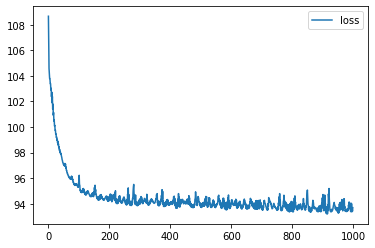

In [46]:
plt.plot(ae.loss, label='loss')
plt.legend()

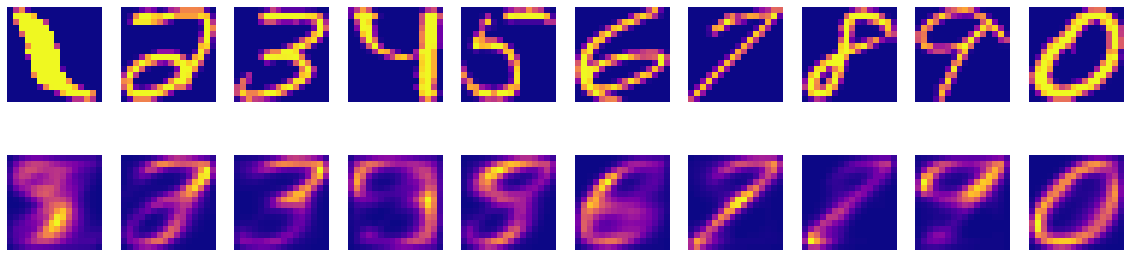

In [47]:
getImages(xTrain)

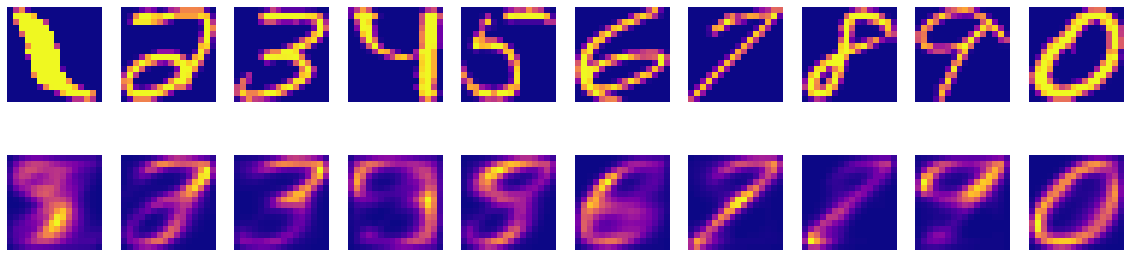

In [48]:
getImages(xTrain)

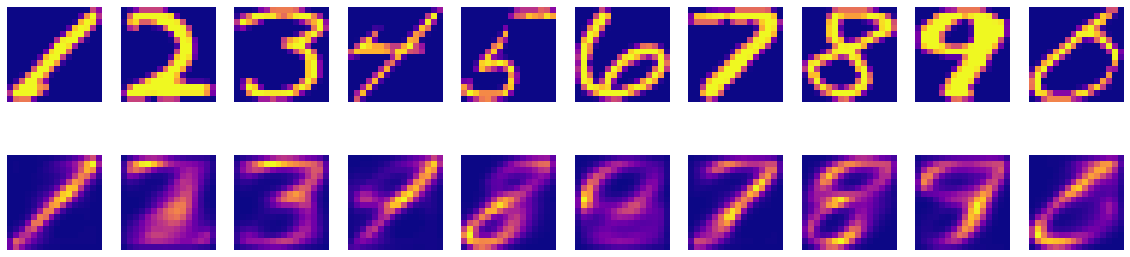

In [49]:
getImages(xValidation)